In [1]:
from markovchain import MarkovChain
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q1

In [2]:
P = np.array([
    [0.5, 0 , 0 , 0 , 0.5],
    [0 , 0.5,0 ,  0.5 , 0],
    [0 , 0,1 ,  0 , 0],
    [0 , 0.25,0.25 ,  0.25 , 0.25],
    [0.5, 0 , 0 , 0 , 0.5]
    ]
             )
states = ['A', 'B' , 'C' , 'D' , 'E']


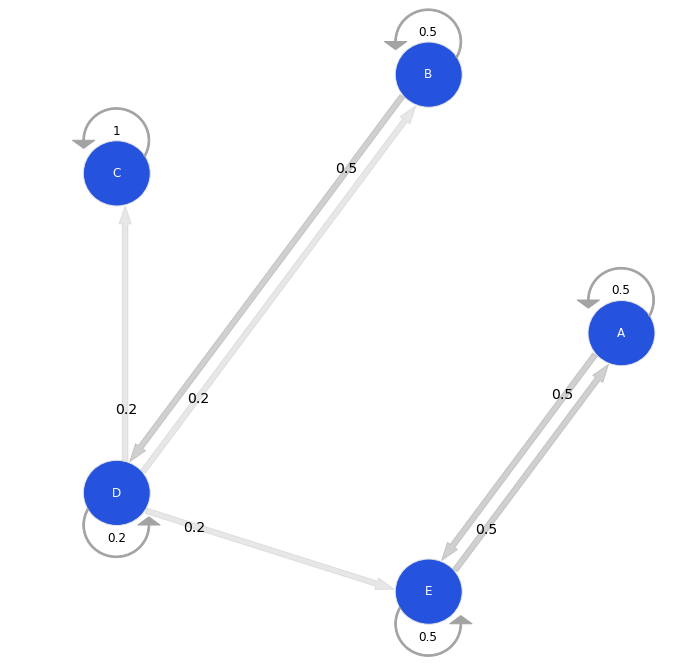

In [3]:
mc = MarkovChain(P, states)
mc.draw()

In [4]:
def isreducible(P):
  numStates = P.shape[0]
  zeroTol = numStates*np.spacing(1)
  Z = P > zeroTol
  A1 = (np.eye(numStates)+Z)
  Q = np.linalg.matrix_power(A1,(numStates-1));
  F = np.column_stack([Q.flatten()])
  F1 = np.any(F < zeroTol)
  tf = np.full(1 ,F1)[0]
  return tf


In [5]:
print("It's reduciblele ---> " + str(isreducible(P)))

It's reduciblele ---> True


In [6]:
def convert_to_graph(P, states:list):
  graph={}
  for i in range(len(states)):
    row={}
    for j in range(len(states)):
      if P[i][j] >0.0 :
        row[states[j]] = P[i][j]
    graph[states[i]] = row
  return graph


In [7]:
convert_to_graph(P.tolist(), states)

{'A': {'A': 0.5, 'E': 0.5},
 'B': {'B': 0.5, 'D': 0.5},
 'C': {'C': 1.0},
 'D': {'B': 0.25, 'C': 0.25, 'D': 0.25, 'E': 0.25},
 'E': {'A': 0.5, 'E': 0.5}}

In [8]:
def strongly_connected_components(graph):
    index, lowlinks = {}, {}
    stack, result = [], []
    index_counter = [0]

    def connect(node):
        index[node] = index_counter[0]
        lowlinks[node] = index_counter[0]
        index_counter[0] += 1
        stack.append(node)

        try:
            successors = graph[node]
        except KeyError:
            successors = []

        for succ in successors:
            if succ not in lowlinks:
                connect(succ)
                lowlinks[node] = min(lowlinks[node], lowlinks[succ])
            elif succ in stack:
                lowlinks[node] = min(lowlinks[node], index[succ])

        if lowlinks[node] == index[node]:
            connected_component = set()

            neighbours = set()
            while True:
                succ = stack.pop()
                connected_component.add(succ)

                for nb in graph[succ]:
                    neighbours.add(nb)
                if succ == node:
                    break

            cp_type = "closed" if neighbours <= connected_component else "open"

            result.append({
                "states": connected_component,
                "type": cp_type
            })

    for node in graph:
        if node not in lowlinks:
            connect(node)

    return result


In [9]:
strongly_connected_components(convert_to_graph(P.tolist(), states))

[{'states': {'A', 'E'}, 'type': 'closed'},
 {'states': {'C'}, 'type': 'closed'},
 {'states': {'B', 'D'}, 'type': 'open'}]

# Q2

In [10]:
n = 1
p = 0.5
res = []
for i in range(1000):
  x = np.random.binomial(n, p, size=200)
  x[ x == 0] = -1
  res.append(sum(x))


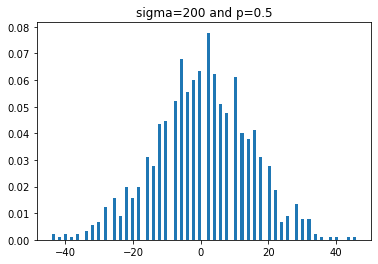

In [11]:
x = plt.hist(res, bins=100,density=True)
E=plt.title("sigma=200 and p=0.5")

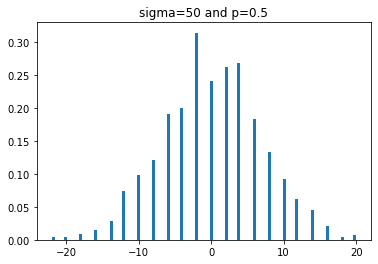

In [13]:
n = 1
p = 0.5
res = []
for i in range(1000):
  x = np.random.binomial(n, p, size=50)
  x[ x == 0] = -1
  res.append(sum(x))
x = plt.hist(res, bins=100,density=True)
E=plt.title("sigma=50 and p=0.5")

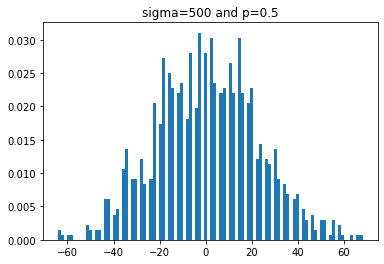

In [14]:
n = 1
p = 0.5
res = []
for i in range(1000):
  x = np.random.binomial(n, p, size=500)
  x[ x == 0] = -1
  res.append(sum(x))
x = plt.hist(res, bins=100,density=True)
E=plt.title("sigma=500 and p=0.5")

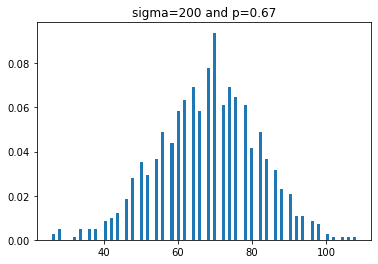

In [15]:
n = 1
p = 0.67
res = []
for i in range(1000):
  x = np.random.binomial(n, p, size=200)
  x[ x == 0] = -1
  res.append(sum(x))
x = plt.hist(res, bins=100,density=True)
E=plt.title("sigma=200 and p=0.67")

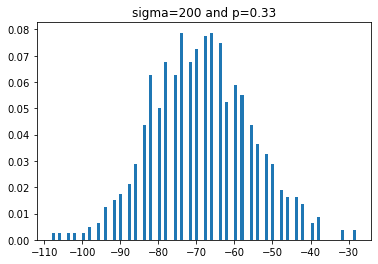

In [16]:
n = 1
p = 0.33
res = []
for i in range(1000):
  x = np.random.binomial(n, p, size=200)
  x[ x == 0] = -1
  res.append(sum(x))
x = plt.hist(res, bins=100,density=True)
E=plt.title("sigma=200 and p=0.33")

we started from 0 and we wanted to produce bernouli random variable to move forward with probability p if random variable was 1
and move backward with probability 1-p if random variable was 0 so we used np.random.binomial(1,p) to produce bernouli random variable 
we changed random variable which equals 0 to -1 and calculate the sum of all produced random variables to measure resultant of movement which is 0 and it's ok because expectedvalue of movement theorically is 0(Ex = 1*p + (-1)*(1-p) if p=0.5 then Ex=0)
so the final point is 0
we observed that sigma doesn't have significance effect on the final point but if we increase p the final point shift to right
and if we decrease p the final point shift to left

# Q3

In [41]:
n = 1
p = 0.5
dest = 0
N=10
for i in range(100000):
  x = np.random.binomial(n, p, size=1)
  if (dest==0 and x[0]==1):
    dest+=1
  if (0<dest<N and x[0]==0):
    dest-=1
  if (dest==N and x[0]==0):
    dest-=1
  if (0<dest<N and x[0]==1):
    dest+=1  

In [42]:
print("Finally we are on location "+str(sit))

Finally we are on location 3


we started from 0 and we wanted to produce bernouli random variable to move forward with probability p if random variable was 1 and move backward with probability  1-p if random variable was 0 (except point 0 and N) so we used np.random.binomial(1,p) to produce bernouli random variable and sit is our situation variable

In [32]:
q = 0.5
p=0.5
matrix = [
    [q, p, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [q, 0, p, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, q, 0, p, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, q, 0, p, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, q, 0, p, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, q, 0, p, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, q, 0, p, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, q, 0, p, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, q, 0, p, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, q, 0, p],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, q, p],
    ]
matrix = sp.Matrix(matrix)
vec = matrix.eigenvects()

In [33]:
matrix

Matrix([
[0.5, 0.5,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[0.5,   0, 0.5,   0,   0,   0,   0,   0,   0,   0,   0],
[  0, 0.5,   0, 0.5,   0,   0,   0,   0,   0,   0,   0],
[  0,   0, 0.5,   0, 0.5,   0,   0,   0,   0,   0,   0],
[  0,   0,   0, 0.5,   0, 0.5,   0,   0,   0,   0,   0],
[  0,   0,   0,   0, 0.5,   0, 0.5,   0,   0,   0,   0],
[  0,   0,   0,   0,   0, 0.5,   0, 0.5,   0,   0,   0],
[  0,   0,   0,   0,   0,   0, 0.5,   0, 0.5,   0,   0],
[  0,   0,   0,   0,   0,   0,   0, 0.5,   0, 0.5,   0],
[  0,   0,   0,   0,   0,   0,   0,   0, 0.5,   0, 0.5],
[  0,   0,   0,   0,   0,   0,   0,   0,   0, 0.5, 0.5]])

In [34]:
print("checking whether sum of each eigenvector items is equal to 1 or not:")

for i in range(10):
  siv = np.array(vec[i][2]).astype(np.float32)
  print(siv.sum())

checking whether sum of each eigenvector items is equal to 1 or not:
-5.9604645e-08
0.0
-5.9604645e-08
0.0
5.9604645e-08
0.0
-8.940697e-08
5.9604645e-08
3.3166246
0.0


In this section for calculationg steady state theorically first we formed transfer matrix and found eigenvalue and eigenvector of this matrix to see wether none of its eigenvector has sum of items equal to 1 or not and we saw they hadn't so we found that this problem has no steady state

# Q4

In [58]:
start = np.random.randint(1,5)
out= []
lens= []
for i in range(1000000):
  k = start
  res= [k]
  while True:
    a = np.random.randint(k+1,6)
    res.append(a)
    k= a
    if a==5:
      break
  out.append(res)
  lens.append(len(res)-1)

In [59]:
X = np.array(lens)
print("Mean of length we will travel to reach location 5 is "+str(X.mean()))

Mean of length we will travel to reach location 5 is 1.500026


First we chose our starting point for this we used np.random.randint becuse starting point has discrete uniform distribution
Then we went from starting point to next points until we reached point 5 and each step we needed to choice next point uniformly so we used np.random.randint
we did this 10000000 times and saved our move path in array res to calculate the distribution of possible movements then we used 
function len() to calculate movement length and its distribution we observed that the mean of length we will travel to reach location 5 ranges from 1.4 to 1.8 which its mean is 1.6 and that is so closed to what we calculted theorically